# `dict`

## Problem Statement: Vigenère Cipher

In [103]:
from string import ascii_lowercase
from itertools import repeat, cycle, islice

CODEBOOK = {x: {y: z for y,z in zip(ascii_lowercase, islice(cycle(ascii_lowercase), i, None))}
            for i, x in enumerate(ascii_lowercase)}

def encipher(message, key, codebook=CODEBOOK):
    message = ''.join(m for m in message.lower() if m in codebook)
    return ''.join(codebook[k][m] for k, m in zip(cycle(key), message))

def decipher(message, key, codebook=CODEBOOK):
    decodebook = {x: {z:y for y,z in yz.items()} for x, yz in codebook.items()}
    return ''.join(decodebook[k][m] for k, m in zip(cycle(key), message))

In [104]:
msg = 'Attack at dawn!'
key = 'python'
enc_msg = encipher(msg, key)
enc_msg

'prmhqxprwhka'

In [105]:
decipher(enc_msg, key)

'attackatdawn'

## Problem Statement: Concordance (Word Count)

In [106]:
! wget -O paradise-lost.txt 'http://www.gutenberg.org/cache/epub/26/pg26.txt'

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [107]:
! head -n 10 paradise-lost.txt

'head' is not recognized as an internal or external command,
operable program or batch file.


In [108]:
from re import sub

def concordance(text):
    freq = {}
    for word in text.split():
        word = sub('[^\w]', '', word.lower())
        if word not in freq:
            freq[word] = 0
        freq[word] += 1
    return freq   

In [109]:
with open('paradise-lost.txt') as f:
    text = ''.join(f)
    
freq = concordance(text)
sorted(freq.items(), key=lambda kv: kv[1], reverse=True)[:10]

IOError: [Errno 2] No such file or directory: 'paradise-lost.txt'

## dict

#### as a dictionary

In [110]:
dictionary = {'one': 'uno', 
              'two': 'dos',
              'three': 'tres'}

dictionary['one']

'uno'

In [111]:
dictionary['uno']

KeyError: 'uno'

In [112]:
dictionary['four']

KeyError: 'four'

In [113]:
dictionary['four'] = 'cuatro'
dictionary

{'four': 'cuatro', 'one': 'uno', 'three': 'tres', 'two': 'dos'}

In [114]:
del dictionary['one']
del dictionary['two']
dictionary

{'four': 'cuatro', 'three': 'tres'}

#### as a map

In [115]:
course_professors = {'calculus':       'Prof. Kotter',
                     'diff eq':        'Prof. Feeny',
                     'linear algebra': 'Prof. Kotter',
                     'real analysis':  'Prof. Crabtree'}

student_courses = {'vinnie':    ['calculus', 'diff eq'],
                   'arnold':    ['calculus', 'linear algebra'],
                   'juan luis': ['real analysis']}

In [116]:
student_courses = {'vinnie':    {'calculus', 'diff eq'},
                   'arnold':    {'calculus', 'linear algebra'},
                   'juan luis': {'real analysis'}}

In [117]:
student_professors = {} # which student has which professor?

for student in student_courses:
    for course in student_courses[student]:
        if student not in student_professors:
            student_professors[student] = set()
        student_professors[student].add(course_professors[course])

student_professors

{'arnold': {'Prof. Kotter'},
 'juan luis': {'Prof. Crabtree'},
 'vinnie': {'Prof. Feeny', 'Prof. Kotter'}}

#### creating a `dict`

In [118]:
xs = {1: 1, 2: 4, 3:9}
xs

{1: 1, 2: 4, 3: 9}

In [119]:
xs = dict(one='uno', two='dos')
xs

{'one': 'uno', 'two': 'dos'}

In [120]:
xs = dict([('uno',  'one'),
           ('dos',  'two'),
           ('tres', 'three'),])
xs

{'dos': 'two', 'tres': 'three', 'uno': 'one'}

In [121]:
from string import ascii_lowercase
xs = dict.fromkeys(ascii_lowercase)
xs

{'a': None,
 'b': None,
 'c': None,
 'd': None,
 'e': None,
 'f': None,
 'g': None,
 'h': None,
 'i': None,
 'j': None,
 'k': None,
 'l': None,
 'm': None,
 'n': None,
 'o': None,
 'p': None,
 'q': None,
 'r': None,
 's': None,
 't': None,
 'u': None,
 'v': None,
 'w': None,
 'x': None,
 'y': None,
 'z': None}

In [122]:
xs = {[1,2,3]: 10}

TypeError: unhashable type: 'list'

In [123]:
xs = {1:1, 2:4, 3:9}
ys = dict(xs)
ys

{1: 1, 2: 4, 3: 9}

#### `dict.update`

In [124]:
xs = {1:1, 2:4, 3:9}
ys = {}
ys.update(xs)
ys

{1: 1, 2: 4, 3: 9}

#### `dict` methods

In [125]:
dir({})

['__class__',
 '__cmp__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'clear',
 'copy',
 'fromkeys',
 'get',
 'has_key',
 'items',
 'iteritems',
 'iterkeys',
 'itervalues',
 'keys',
 'pop',
 'popitem',
 'setdefault',
 'update',
 'values',
 'viewitems',
 'viewkeys',
 'viewvalues']

In [126]:
[attr for attr in dir({}) if '__' not in attr]

['clear',
 'copy',
 'fromkeys',
 'get',
 'has_key',
 'items',
 'iteritems',
 'iterkeys',
 'itervalues',
 'keys',
 'pop',
 'popitem',
 'setdefault',
 'update',
 'values',
 'viewitems',
 'viewkeys',
 'viewvalues']

#### `dict.clear`

In [127]:
xs = {'one': 'uno'}
xs

{'one': 'uno'}

In [128]:
xs['two'] = 'dos'
xs

{'one': 'uno', 'two': 'dos'}

In [129]:
xs.clear()
xs

{}

#### `dict.copy`

In [130]:
xs = {'one': 'uno'}
ys = xs.copy()
xs.clear()

In [131]:
xs

{}

In [132]:
ys

{'one': 'uno'}

In [133]:
xs = {'one': {'spanish': 'uno',
              'german':  'ein',
              'french':  'un'}}
xs

{'one': {'french': 'un', 'german': 'ein', 'spanish': 'uno'}}

In [134]:
ys = xs.copy()
xs['one'].clear()
ys

{'one': {}}

#### `dict.get`

In [135]:
xs = {'one': 'uno'}
xs['two']

KeyError: 'two'

In [136]:
def get_word(d, word):
    if word in d:
        return d[word]
    return None    

In [137]:
xs.get('two', 'unknown')

'unknown'

#### `dict.pop`, `dict.popitem`

In [138]:
xs = {'one': 'uno', 'two': 'dos'}
xs.pop('one')
xs

{'two': 'dos'}

In [139]:
xs.pop('one')

KeyError: 'one'

In [140]:
xs.pop('one', 'default')

'default'

In [141]:
xs.popitem()

('two', 'dos')

#### `dict.keys`, `dict.values`, `dict.items`

In [142]:
d = {'uno': 'one', 'dos': 'two', 'tres': 'three'}

for key in d:
    print (key)

dos
tres
uno


In [143]:
for key in d.keys():
    print (key)

dos
tres
uno


In [144]:
for value in d.values():
    print (value)

two
three
one


In [145]:
for item in d.items():
    print (item)

('dos', 'two')
('tres', 'three')
('uno', 'one')


In [146]:
# iterkeys, itervalues, iteritems in Python 2
# viewkeys, viewvalues, viewitems in Python 2

d = {'uno': 'one', 'dos': 'two', 'tres': 'three'}
keys = d.keys()
keys

['dos', 'tres', 'uno']

In [147]:
d['cinco'] = 'five'
d

{'cinco': 'five', 'dos': 'two', 'tres': 'three', 'uno': 'one'}

In [148]:
keys

['dos', 'tres', 'uno']

#### `dict.setdefault`

In [149]:
student_courses = {'vinnie':    {'calculus', 'diff eq'},
                   'arnold':    {'calculus', 'linear algebra'},
                   'juan luis': {'real analysis'}}

student_courses['vinnie'].add('linear algebra')

In [150]:
student_courses['freddie'].add('linear algebra')

KeyError: 'freddie'

In [151]:
if 'freddie' not in student_courses:
    student_courses['freddie'] = set()
student_courses['freddie'].add('linear algebra')

In [152]:
student_courses.setdefault('rosalie', set()).add('calculus')
student_courses

{'arnold': {'calculus', 'linear algebra'},
 'freddie': {'linear algebra'},
 'juan luis': {'real analysis'},
 'rosalie': {'calculus'},
 'vinnie': {'calculus', 'diff eq', 'linear algebra'}}

#### `dict.__missing__`

In [153]:
class lowercasedict(dict):
    def __missing__(self, key):
        return self[key.lower()]

In [154]:
d = lowercasedict({'uno': 'one', 'dos': 'two'})

In [155]:
d['UNO']

'one'

#### `dict`-comprehensions

In [156]:
{x: x**2 for x in range(10)}

{0: 0, 1: 1, 2: 4, 3: 9, 4: 16, 5: 25, 6: 36, 7: 49, 8: 64, 9: 81}

In [157]:
# substitution cipher
from string import ascii_lowercase
ascii_lowercase

'abcdefghijklmnopqrstuvwxyz'

In [158]:
from random import shuffle
shuffle(ascii_lowercase)

TypeError: 'str' object does not support item assignment

In [159]:
alphabet = list(ascii_lowercase)
alphabet

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [160]:
shuffle(alphabet)
alphabet

['l',
 'j',
 'n',
 'u',
 'i',
 'e',
 'g',
 'o',
 'y',
 'p',
 'm',
 'd',
 'a',
 'c',
 'v',
 'f',
 'q',
 's',
 'k',
 'z',
 'w',
 't',
 'h',
 'r',
 'x',
 'b']

In [161]:
codebook = {x:alphabet.pop() for x in ascii_lowercase}
codebook

{'a': 'b',
 'b': 'x',
 'c': 'r',
 'd': 'h',
 'e': 't',
 'f': 'w',
 'g': 'z',
 'h': 'k',
 'i': 's',
 'j': 'q',
 'k': 'f',
 'l': 'v',
 'm': 'c',
 'n': 'a',
 'o': 'd',
 'p': 'm',
 'q': 'p',
 'r': 'y',
 's': 'o',
 't': 'g',
 'u': 'e',
 'v': 'i',
 'w': 'u',
 'x': 'n',
 'y': 'j',
 'z': 'l'}

In [162]:
message = 'python is great'

In [163]:
encoded = ''.join(codebook.get(m,'') for m in message)
encoded

'mjgkdasozytbg'

In [164]:
reverse_codebook = {v:k for k,v in codebook.items()}

In [165]:
print (''.join(reverse_codebook.get(m,'') for m in 'ysdvmulizkwxd'))

riolpwzvghfbo


#### as a lookup-table

In [166]:
sine = [-0.0000, -0.0495, -0.0988, -0.1479,
        -0.1966, -0.2449, -0.2925, -0.3394,
        -0.3855, -0.4307, -0.4748, -0.5177,
        -0.5594, -0.5997, -0.6386, -0.6758,
        -0.7115, -0.7453, -0.7774, -0.8076,
        -0.8357, -0.8619, -0.8859, -0.9078,
        -0.9274, -0.9448, -0.9598, -0.9725,
        -0.9828, -0.9908, -0.9963, -0.9993,
        -0.9999, -0.9981, -0.9938, -0.9871,
        -0.9780, -0.9665, -0.9526, -0.9364,
        -0.9179, -0.8971, -0.8742, -0.8491,
        -0.8219, -0.7927, -0.7616, -0.7286,
        -0.6939, -0.6574, -0.6193, -0.5798,
        -0.5387, -0.4964, -0.4529, -0.4082,
        -0.3626, -0.3161, -0.2688, -0.2208,
        -0.1723, -0.1234, -0.0741, -0.0247,
         0.0247,  0.0741,  0.1234,  0.1723,
         0.2208,  0.2688,  0.3161,  0.3626,
         0.4082,  0.4529,  0.4964,  0.5387,
         0.5798,  0.6193,  0.6574,  0.6939,
         0.7286,  0.7616,  0.7927,  0.8219,
         0.8491,  0.8742,  0.8971,  0.9179,
         0.9364,  0.9526,  0.9665,  0.9780,
         0.9871,  0.9938,  0.9981,  0.9999,
         0.9993,  0.9963,  0.9908,  0.9828,
         0.9725,  0.9598,  0.9448,  0.9274,
         0.9078,  0.8859,  0.8619,  0.8357,
         0.8076,  0.7774,  0.7453,  0.7115,
         0.6758,  0.6386,  0.5997,  0.5594,
         0.5177,  0.4748,  0.4307,  0.3855,
         0.3394,  0.2925,  0.2449,  0.1966,
         0.1479,  0.0988,  0.0495,  0.0000,]

In [167]:
from math import pi
angle = 0
angle

0

In [168]:
angle_index = int((pi + angle) / (2 * pi) * len(sine))
angle_index

64

In [169]:
sine[angle_index-1]

-0.0247

In [170]:
from math import sin
sin(angle)

0.0

In [171]:
sine[angle_index], sine[angle_index-1]

(0.0247, -0.0247)

In [172]:
# table of values
table = {-3.1416: -0.0000, -3.0921: -0.0495, -3.0426: -0.0988, -2.9932: -0.1479, 
         -2.9437: -0.1966, -2.8942: -0.2449, -2.8447: -0.2925, -2.7953: -0.3394, 
         -2.7458: -0.3855, -2.6963: -0.4307, -2.6469: -0.4748, -2.5974: -0.5177, 
         -2.5479: -0.5594, -2.4984: -0.5997, -2.4490: -0.6386, -2.3995: -0.6758, 
         -2.3500: -0.7115, -2.3005: -0.7453, -2.2511: -0.7774, -2.2016: -0.8076, 
         -2.1521: -0.8357, -2.1026: -0.8619, -2.0532: -0.8859, -2.0037: -0.9078, 
         -1.9542: -0.9274, -1.9047: -0.9448, -1.8553: -0.9598, -1.8058: -0.9725, 
         -1.7563: -0.9828, -1.7068: -0.9908, -1.6574: -0.9963, -1.6079: -0.9993, 
         -1.5584: -0.9999, -1.5090: -0.9981, -1.4595: -0.9938, -1.4100: -0.9871, 
         -1.3605: -0.9780, -1.3111: -0.9665, -1.2616: -0.9526, -1.2121: -0.9364, 
         -1.1626: -0.9179, -1.1132: -0.8971, -1.0637: -0.8742, -1.0142: -0.8491, 
         -0.9647: -0.8219, -0.9153: -0.7927, -0.8658: -0.7616, -0.8163: -0.7286, 
         -0.7668: -0.6939, -0.7174: -0.6574, -0.6679: -0.6193, -0.6184: -0.5798, 
         -0.5689: -0.5387, -0.5195: -0.4964, -0.4700: -0.4529, -0.4205: -0.4082, 
         -0.3711: -0.3626, -0.3216: -0.3161, -0.2721: -0.2688, -0.2226: -0.2208, 
         -0.1732: -0.1723, -0.1237: -0.1234, -0.0742: -0.0741, -0.0247: -0.0247, 
          0.0247:  0.0247,  0.0742:  0.0741,  0.1237:  0.1234,  0.1732:  0.1723, 
          0.2226:  0.2208,  0.2721:  0.2688,  0.3216:  0.3161,  0.3711:  0.3626, 
          0.4205:  0.4082,  0.4700:  0.4529,  0.5195:  0.4964,  0.5689:  0.5387, 
          0.6184:  0.5798,  0.6679:  0.6193,  0.7174:  0.6574,  0.7668:  0.6939, 
          0.8163:  0.7286,  0.8658:  0.7616,  0.9153:  0.7927,  0.9647:  0.8219, 
          1.0142:  0.8491,  1.0637:  0.8742,  1.1132:  0.8971,  1.1626:  0.9179, 
          1.2121:  0.9364,  1.2616:  0.9526,  1.3111:  0.9665,  1.3605:  0.9780, 
          1.4100:  0.9871,  1.4595:  0.9938,  1.5090:  0.9981,  1.5584:  0.9999, 
          1.6079:  0.9993,  1.6574:  0.9963,  1.7068:  0.9908,  1.7563:  0.9828, 
          1.8058:  0.9725,  1.8553:  0.9598,  1.9047:  0.9448,  1.9542:  0.9274, 
          2.0037:  0.9078,  2.0532:  0.8859,  2.1026:  0.8619,  2.1521:  0.8357, 
          2.2016:  0.8076,  2.2511:  0.7774,  2.3005:  0.7453,  2.3500:  0.7115, 
          2.3995:  0.6758,  2.4490:  0.6386,  2.4984:  0.5997,  2.5479:  0.5594, 
          2.5974:  0.5177,  2.6469:  0.4748,  2.6963:  0.4307,  2.7458:  0.3855, 
          2.7953:  0.3394,  2.8447:  0.2925,  2.8942:  0.2449,  2.9437:  0.1966, 
          2.9932:  0.1479,  3.0426:  0.0988,  3.0921:  0.0495,  3.1416:  0.0000}

In [173]:
from bisect import bisect 
# from __future__ import division

class interpolating_dict(dict):
    def __missing__(self, key):
        sorted_keys = sorted(self.keys())
        
        index = bisect(sorted_keys, key)
        
        if index == 0 or index == len(sorted_keys):
            raise KeyError('cannot extrapolate value {}'.format(key))
        
        left_key, right_key = sorted_keys[index-1], sorted_keys[index]
        left_val, right_val = self[left_key], self[right_key]
        
        slope = (right_val - left_val) / (right_key - left_key)
        self[key] = value = slope * (key - left_key) + left_val
        return value        

In [174]:
sine = interpolating_dict(table)

In [175]:
sine[3.1416]

0.0

In [176]:
sine[0]

0.0

In [177]:
sine[pi/2]

0.9997497414933952

In [178]:
sine

{-3.1416: -0.0,
 -3.0921: -0.0495,
 -3.0426: -0.0988,
 -2.9932: -0.1479,
 -2.9437: -0.1966,
 -2.8942: -0.2449,
 -2.8447: -0.2925,
 -2.7953: -0.3394,
 -2.7458: -0.3855,
 -2.6963: -0.4307,
 -2.6469: -0.4748,
 -2.5974: -0.5177,
 -2.5479: -0.5594,
 -2.4984: -0.5997,
 -2.449: -0.6386,
 -2.3995: -0.6758,
 -2.35: -0.7115,
 -2.3005: -0.7453,
 -2.2511: -0.7774,
 -2.2016: -0.8076,
 -2.1521: -0.8357,
 -2.1026: -0.8619,
 -2.0532: -0.8859,
 -2.0037: -0.9078,
 -1.9542: -0.9274,
 -1.9047: -0.9448,
 -1.8553: -0.9598,
 -1.8058: -0.9725,
 -1.7563: -0.9828,
 -1.7068: -0.9908,
 -1.6574: -0.9963,
 -1.6079: -0.9993,
 -1.5584: -0.9999,
 -1.509: -0.9981,
 -1.4595: -0.9938,
 -1.41: -0.9871,
 -1.3605: -0.978,
 -1.3111: -0.9665,
 -1.2616: -0.9526,
 -1.2121: -0.9364,
 -1.1626: -0.9179,
 -1.1132: -0.8971,
 -1.0637: -0.8742,
 -1.0142: -0.8491,
 -0.9647: -0.8219,
 -0.9153: -0.7927,
 -0.8658: -0.7616,
 -0.8163: -0.7286,
 -0.7668: -0.6939,
 -0.7174: -0.6574,
 -0.6679: -0.6193,
 -0.6184: -0.5798,
 -0.5689: -0.5387,
 -0

#### as a relation or a function

In [179]:
from math import sqrt

def roots(a,b,c):
    return (-b + sqrt(b**2 - 4*a*c))/(2*a)

In [180]:
roots(1,2,1) # (x+1)(x+1) == x² + 2x + 1

-1.0

In [181]:
class rootdict(dict): # ???
    def __missing__(self, key):
        a, b, c = key
        return (-b + sqrt(b**2 - 4*a*c))/(2*a)

In [182]:
d = rootdict()
d[1,2,1]

-1.0

In [183]:
from sys import version_info
assert version_info.major == 3 and version_info.minor >= 3, \
  'requires PEP 362; Python 3.3 or later; python.org/dev/peps/pep-0362/'
 
from inspect import signature
class memoise(dict):
    def __init__(self, func):
        self.func, self.signature = func, signature(func)
    def __missing__(self, key):
        args, kwargs = key
        self[key] = self.func(*args, **dict(kwargs))
        return self[key]
    def __call__(self, *args, **kwargs):
        key = self.signature.bind(*args, **kwargs)
        return self[key.args, frozenset(key.kwargs.items())]

AssertionError: requires PEP 362; Python 3.3 or later; python.org/dev/peps/pep-0362/

In [184]:
from time import sleep

@memoise
def roots(a,b,c):
    sleep(1)
    return (-b + sqrt(b**2 - 4*a*c))/(2*a)

NameError: name 'memoise' is not defined

In [185]:
% time roots(1,2,1)

Wall time: 0 ns


-1.0

In [186]:
% time roots(1,2,1)

Wall time: 0 ns


-1.0

In [187]:
roots(2,4,2)

-1.0

In [188]:
roots

<function __main__.roots>

#### `__getitem__` and `__call__`

In [189]:
d = {1: 1, 2:4}
d[2]

4

In [190]:
d.__getitem__(2)

4

In [191]:
class Foo:
    def __getitem__(self, key):
        return key**2

In [192]:
foo = Foo()
foo[13]

169

In [193]:
class Foo:
    def __call__(self, val):
        return val**2

In [194]:
foo = Foo()
foo(10)

100

#### `dict`-alikes

In [195]:
from contextlib import closing
from pandas import HDFStore, DataFrame
from numpy import linspace

df = DataFrame()
df['val'] = linspace(0, 10**4, 10000)

with closing(HDFStore('test.hd5')) as store:
    store['key'] = df

In [196]:
store

<class 'pandas.io.pytables.HDFStore'>
File path: test.hd5
File is CLOSED

In [197]:
from IPython.display import display

with closing(HDFStore('test.hd5')) as store:
    display(store)
    display(store['key'].head())

<class 'pandas.io.pytables.HDFStore'>
File path: test.hd5
/key            frame        (shape->[10000,1])

,val
0,0.0000
1,1.0001
2,2.0002
3,3.0003
4,4.0004


#### `dict.__missing__`

In [198]:
from collections import Iterable

class rangedict(dict):
    def __missing__(self, key):
        for k, v in self.items():
            if isinstance(k, Iterable):
                left, right = k
                if left <= key < right:
                    self[key] = v
                    return v
        raise KeyError('cannot find {} in rangedict'.format(key))

In [199]:
codes = rangedict({(  0,   10): 'red',
                   ( 10,  100): 'yellow',
                   (100, 1000): 'green', })

codes[105]

'green'

In [200]:
codes

{105: 'green', (0, 10): 'red', (10, 100): 'yellow', (100, 1000): 'green'}

In [201]:
class passthrudict(dict):
    def __missing__(self, key):
        return key

In [202]:
censor = passthrudict({'hell': 'h***',
                       'darn': 'd*rn',})

sentence = "That darn cat!"

' '.join(censor[w] for w in sentence.split())

'That d*rn cat!'

In [203]:
sentence = "Y'all can go to hell; I'm going to Texas!"

' '.join(censor[w] for w in sentence.split())

"Y'all can go to hell; I'm going to Texas!"

In [204]:
from itertools import groupby, chain
from unicodedata import category

def fancy_split(s):
    return [''.join(g) for k,g in groupby(s, key=lambda x: category(x)[0] == 'L')]

sentence = "Y'all can go to hell; I'm going to Texas!"
fancy_split(sentence)

TypeError: must be unicode, not str

In [205]:
''.join(censor[w] for w in fancy_split(sentence))

TypeError: must be unicode, not str

#### `collections.defaultdict`

In [206]:
student_courses = {'vinnie':    {'calculus', 'diff eq'},
                   'arnold':    {'calculus', 'linear algebra'},
                   'juan luis': {'real analysis'}}

student_courses['freddie'] = set()
student_courses['freddie'].add('linear algebra')

In [207]:
from collections import defaultdict

student_courses = defaultdict(set)
student_courses.update({'vinnie':    {'calculus', 'diff eq'},
                        'arnold':    {'calculus', 'linear algebra'},
                        'juan luis': {'real analysis'}})



In [208]:
student_courses['freddie'].add('linear algebra')
student_courses

defaultdict(<type 'set'>, {'freddie': set(['linear algebra']), 'juan luis': set(['real analysis']), 'vinnie': set(['calculus', 'diff eq']), 'arnold': set(['calculus', 'linear algebra'])})

In [209]:
'foobar' in student_courses

False

In [210]:
student_courses['foobar']

set()

#### as a hash

In [211]:
{[1,2,3]: 4}

TypeError: unhashable type: 'list'

In [212]:
english = ['one', 'two', 'three']
spanish = ['uno', 'dos', 'tres']

In [213]:
english.index('two')

1

In [214]:
spanish[english.index('three')]

'tres'

In [215]:
from bisect import bisect_left
lookup = [en for en,es in sorted(zip(english, spanish))]
value  = [es for en,es in sorted(zip(english, spanish))]

key = 'one'
value[bisect_left(lookup, key)]

'uno'

In [216]:
hash(x)

NameError: name 'x' is not defined

In [217]:
from numpy import array, linspace
from numpy.random import choice, shuffle
from string import ascii_lowercase
from bisect import bisect_left

MAX_SIZE = 10**4

letters = array([c for c in ascii_lowercase])
words   = choice(letters, size=(MAX_SIZE, 10))
words   = array([''.join(w) for w in words])

ns = linspace(1, MAX_SIZE, 500)
list_times = []
dict_times = []
bisect_times = []

for n in ns:
    shuffle(words)
    
    sample_list = list(words[:n])
    sample_dict = dict.fromkeys(sample_list)
    sample_bisect = sorted(sample_list)

    lookup_words = choice(sample_list, size=10)
    
    list_time   = % timeit -q -n1 -o [sample_list.index(w) for w in lookup_words]
    dict_time   = % timeit -q -n1 -o [sample_dict[w] for w in lookup_words]
    bisect_time = % timeit -q -n1 -o [bisect_left(sample_bisect, w) for w in lookup_words]
    
    list_times.append(list_time.best)
    dict_times.append(dict_time.best)
    bisect_times.append(bisect_time.best)

In [218]:
% matplotlib inline

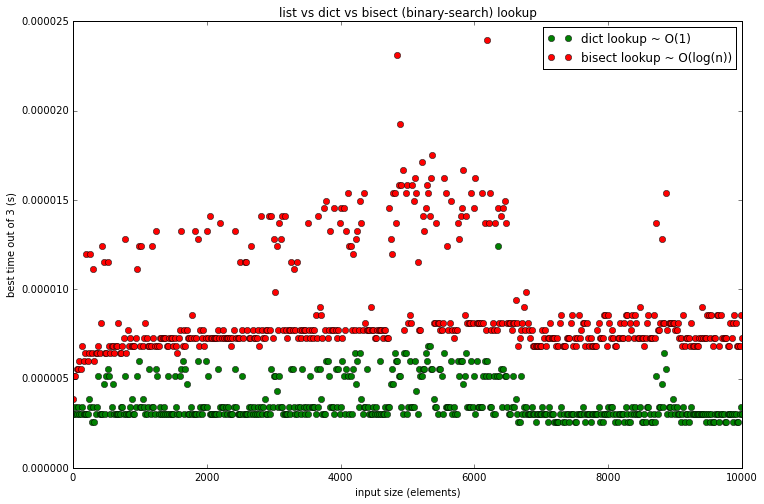

In [219]:
from matplotlib.pyplot import figure, plot, title, legend, ylabel, xlabel, show

fig = figure(figsize=(12,8))

#plot(ns, list_times, 'bo',   label=u'list lookup ~ O(n)')
plot(ns, dict_times, 'go',   label=u'dict lookup ~ O(1)')
plot(ns, bisect_times, 'ro', label=u'bisect lookup ~ O(log(n))')

title('list vs dict vs bisect (binary-search) lookup')
legend(loc='best')
xlabel('input size (elements)', figure=fig)
ylabel('best time out of 3 (s)', figure=fig)
show()

#### dict vs object

In [220]:
class Foo:
    pass

foo = Foo()

In [221]:
foo.x = 10
foo.x

10

In [222]:
getattr(foo, 'x') # "getattr protocol"

10

In [223]:
bar = {}

In [224]:
bar['y'] = 10
bar['y']

10

In [225]:
from operator import getitem # "getitem protocol"

getitem(bar, 'y')

10

In [226]:
foo.__dict__

{'x': 10}

In [227]:
class Base:
    z = 10

class Derived(Base):
    pass

d = Derived()

In [228]:
d.__dict__

{}

In [229]:
getattr(d, 'z')

10

In [230]:
class Foo:
    x = 10
    
foo = Foo()
foo.z = 10

bar = {'y': 20}

% timeit foo.z
% timeit bar['y']

10000000 loops, best of 3: 42.5 ns per loop
10000000 loops, best of 3: 44 ns per loop


In [231]:
class Foo:
    def __getitem__(self, key):
        if key == 'x':
            return 10
        raise KeyError('no such key {}'.format(key))
    
    def __getattr__(self, attr):
        if attr == 'x':
            return 100
        raise AttributeError('no such attr {}'.format(attr))

foo = Foo()

% timeit foo.x
% timeit foo['x']

The slowest run took 4.50 times longer than the fastest. This could mean that an intermediate result is being cached 
1000000 loops, best of 3: 570 ns per loop
The slowest run took 4.54 times longer than the fastest. This could mean that an intermediate result is being cached 
1000000 loops, best of 3: 283 ns per loop


https://docs.python.org/3/reference/datamodel.html#customizing-attribute-access

- `__getattr__` is invoked after other mechanisms fail.

  "Called when an attribute lookup has not found the attribute in the usual places"
  

- `__getattribute__` is always invoked, and it is invoked first.

  "Called unconditionally to implement attribute accesses for instances of the class."

In [232]:
class Foo:
    def __getitem__(self, key):
        if key == 'x':
            return 10
        raise KeyError('no such key {}'.format(key))
    
    def __getattribute__(self, attr):
        if attr == 'x':
            return 10
        raise AttributeError('no such attr {}'.format(attr))

foo = Foo()

% timeit foo.x
% timeit foo['x']

AttributeError: Foo instance has no attribute 'x'

#### semantics

In [ ]:
class Foo:
    def __getattr__(self, attr):
        return attr
    def __getitem__(self, key):
        return key
    
foo = Foo()

In [ ]:
foo['two words'], foo['123'], foo['abc/def']

In [ ]:
#foo.two words
#foo.123
#foo.abc/def

In [ ]:
class Foo:
    def __init__(self):
        self.x = 10
    
foo = Foo()

In [ ]:
foo.x, foo.__dict__['x']

In [ ]:
class Base:
    x = 10
    
class Derived(Base):
    pass

d = Derived()
Base.y = 100
d.y

In [ ]:
from collections import ChainMap

b = {}
d = ChainMap({}, b)

b['x'] = 10
d['x']
d['x'] = 500
d['x']

In [ ]:
class BaseA:
    x = 10

class BaseB:
    x = 100
    y = 200
    
class Derived(BaseA, BaseB):
    pass

d = Derived()
d.x, d.y

In [ ]:
ba = {'x': 10}
bb = {'x': 100, 'y': 200}

d = ChainMap({}, ba, bb)

d['x'], d['y']

In [ ]:
Derived.__mro__

In [ ]:
d = ChainMap({}, *(entry.__dict__ for entry in Derived.__mro__))

d['x'], d['y']

In [ ]:
class Foo:
    def __init__(self, x):
        self.x = x
    
foo = Foo(10)
foo.x

In [ ]:
class Foo:
    def __init__(self, x):
        self._x = x
        
    @property
    def x(self):
        self._x += 1
        return self._x
    
foo = Foo(10)
foo.x, foo.x, foo.x

In [ ]:
class Foo:
    def __init__(self, x):
        self._x = x
        
    def __getitem__(self, key):
        if key == 'x':
            self._x += 1
            return self._x
        raise KeyError('no such key {}'.format(key))
        
foo = Foo(10)
foo['x'], foo['x'], foo['x']

#### attribute dictionary

In [ ]:
class attrdict(dict):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.__dict__ = self

In [ ]:
quux = attrdict()

In [ ]:
quux['w']

In [ ]:
quux.w = 200

In [ ]:
from itertools import count

try: 
    for num in count(1):
        attrdict({i:i for i in range(1024*1024)})
except MemoryError:
    print('Out of memory after creating {} attrdicts'.format(num))

In [ ]:
from gc import collect; collect()

In [ ]:
# better formulation

class attrdict(dict):
    __getattr__ = dict.__getitem__
    __setattr__ = dict.__setitem__
    __delattr__ = dict.__delitem__

In [ ]:
try:
    for num in range(1,150+1):
        attrdict({i:i for i in range(1024*1024)})
except MemoryError:
    print('Out of memory after creating {} attrdicts'.format(num))
    
print('Survived creating {} attrdicts'.format(num+1))

## Problem: Vigenère Cipher

In [ ]:
#     a b c d e f g h i ...
#     ---------------------
# a | b c d e f g h i j
# b | c d e f g h i j k
# c | d e f g h i j k l
# d | e f g h i j k l m
# ...

In [ ]:
CODEBOOK = {
    'a': { 'a': 'b',
           'b': 'c', # ... 
         },
    'b': { 'a': 'c', 
           'b': 'd', 
         },
}

In [ ]:
CODEBOOK['a']['b']

In [ ]:
from string import ascii_lowercase

In [ ]:
CODEBOOK = {x: {} for x in ascii_lowercase}
CODEBOOK

In [ ]:
CODEBOOK = {x: {y: None for y in ascii_lowercase} for x in ascii_lowercase}
CODEBOOK

In [ ]:
CODEBOOK = {x: {y: None for y in ascii_lowercase} for i, x in enumerate(ascii_lowercase)}

In [ ]:
CODEBOOK = {x: {y: ascii_lowercase[(j+i+1) % len(ascii_lowercase)] 
                for j,y in enumerate(ascii_lowercase)} for i, x in enumerate(ascii_lowercase)}
CODEBOOK

In [ ]:
from itertools import islice, cycle

CODEBOOK = {x: {y: z for y,z in zip(ascii_lowercase, islice(cycle(ascii_lowercase), i, None))}
            for i, x in enumerate(ascii_lowercase)}
CODEBOOK

In [ ]:
message = 'a b c 1 2 3'
message = ''.join(m for m in message.lower() if m in CODEBOOK)
message

In [ ]:
from string import ascii_lowercase
from itertools import repeat, cycle, islice

CODEBOOK = {x: {y: z for y,z in zip(ascii_lowercase, islice(cycle(ascii_lowercase), i, None))}
            for i, x in enumerate(ascii_lowercase)}

def encipher(message, key, codebook=CODEBOOK):
    message = ''.join(m for m in message.lower() if m in codebook)
    return ''.join(codebook[k][m] for k, m in zip(cycle(key), message))

def decipher(message, key, codebook=CODEBOOK):
    decodebook = {x: {z:y for y,z in yz.items()} for x, yz in codebook.items()}
    return ''.join(decodebook[k][m] for k, m in zip(cycle(key), message))

In [ ]:
msg = 'Attack at dawn!'
key = 'python'
enc_msg = encipher(msg, key)
enc_msg

In [ ]:
decipher(enc_msg, key)

## Problem Statement: Concordance (Word Count)

In [ ]:
! head -n 10 paradise-lost.txt

In [ ]:
with open('paradise-lost.txt', encoding='utf-8-sig') as f:
    text = ''.join(f)

In [ ]:
text[:50]

In [ ]:
def concordance(text):
    freq = {}
    for word in text.split():
        if word not in freq:
            freq[word] = 0
        freq[word] += 1
    return freq        

concordance(text)

In [ ]:
from re import sub

def concordance(text):
    freq = {}
    for word in text.split():
        word = sub('[^\w]', '', word.lower())
        if word not in freq:
            freq[word] = 0
        freq[word] += 1
    return freq   

In [ ]:
freq = concordance(text)
sorted(freq.items(), key=lambda kv: kv[1], reverse=True)[:10]

In [ ]:
from re import sub

def concordance(text):
    freq = {}
    for word in text.split():
        word = sub('[^\w]', '', word.lower())
        freq[word] = freq.get(word, 0) + 1
    return freq

freq = concordance(text)
sorted(freq.items(), key=lambda kv: kv[1], reverse=True)[:10]

In [ ]:
from collections import defaultdict

x = defaultdict(int)
x['asdfasdf']
x[1]
x

In [ ]:
from re import sub
from collections import defaultdict

def concordance(text):
    freq = defaultdict(int)
    for word in text.split():
        word = sub('[^\w]', '', word.lower())
        freq[word] += 1
    return freq

freq = concordance(text)
sorted(freq.items(), key=lambda kv: kv[1], reverse=True)[:10]

In [ ]:
from collections import Counter
Counter('aabbbc')

In [ ]:
from re import sub
from collections import Counter

def concordance(text):
    return Counter(sub('[^\w]', '', word.lower()) for word in text.split())

freq = concordance(text)
sorted(freq.items(), key=lambda kv: kv[1], reverse=True)[:10]